In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2652,ham,No need for the drug anymore.,NaN,NaN,NaN
632,ham,Oh that was a forwarded message. I thought you...,NaN,NaN,NaN
4879,ham,alright tyler's got a minor crisis and has to ...,NaN,NaN,NaN
3681,ham,"Hello, hello, hi lou sorry it took so long 2 r...",NaN,NaN,NaN
618,ham,I come n pick Ì_ up... Come out immediately af...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop unnamed colums
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
1481,ham,"I'm a guy, browsin is compulsory"
5214,spam,Natalja (25/F) is inviting you to be her frien...
4740,ham,Many more happy returns of the day. I wish you...
2565,ham,I told her I had a Dr appt next week. She thin...
4597,ham,I'm stuck in da middle of da row on da right h...


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2537,ham,That's y we haf to combine n c how lor...
2500,ham,Remember to ask alex about his pizza
2177,ham,Oh k :)why you got job then whats up?
4113,ham,Where are you ? What do you do ? How can you s...
3440,spam,Get a FREE mobile video player FREE movie. To ...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# check duplicate
df.duplicated().sum()

403

In [13]:
# remove duplicates
df=df.drop_duplicates(keep='first')

In [14]:
# check duplicate
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

# 2.Exploratory Data Analysis 

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

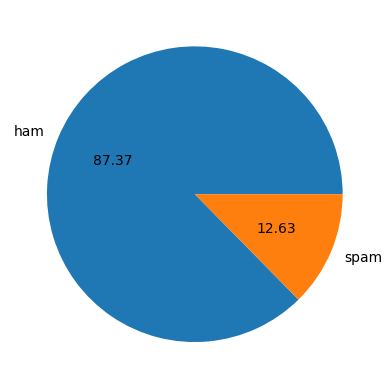

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['num_characters'] = df['text'].apply(len)

In [23]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
# num of sentence
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
#not spam
df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# spam
df[df['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

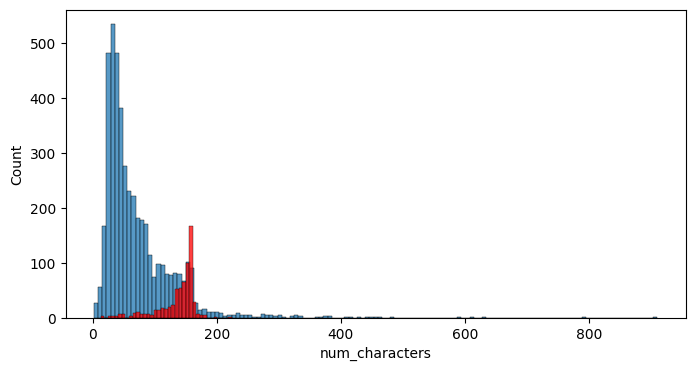

In [30]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

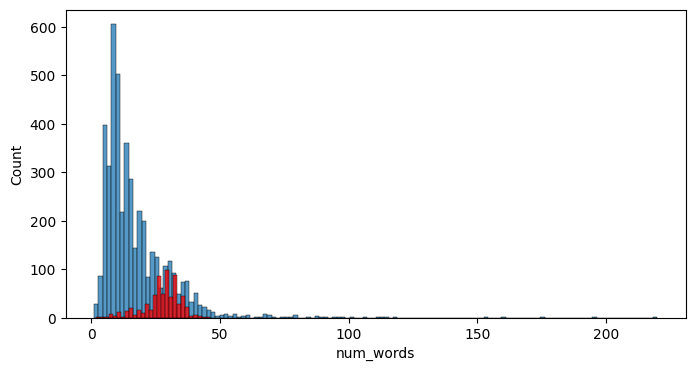

In [31]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentence', ylabel='Count'>

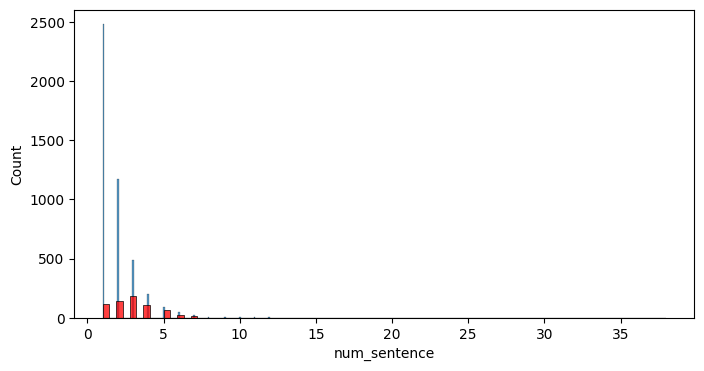

In [32]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['target'] == 0]['num_sentence'])
sns.histplot(df[df['target'] == 1]['num_sentence'],color='red')

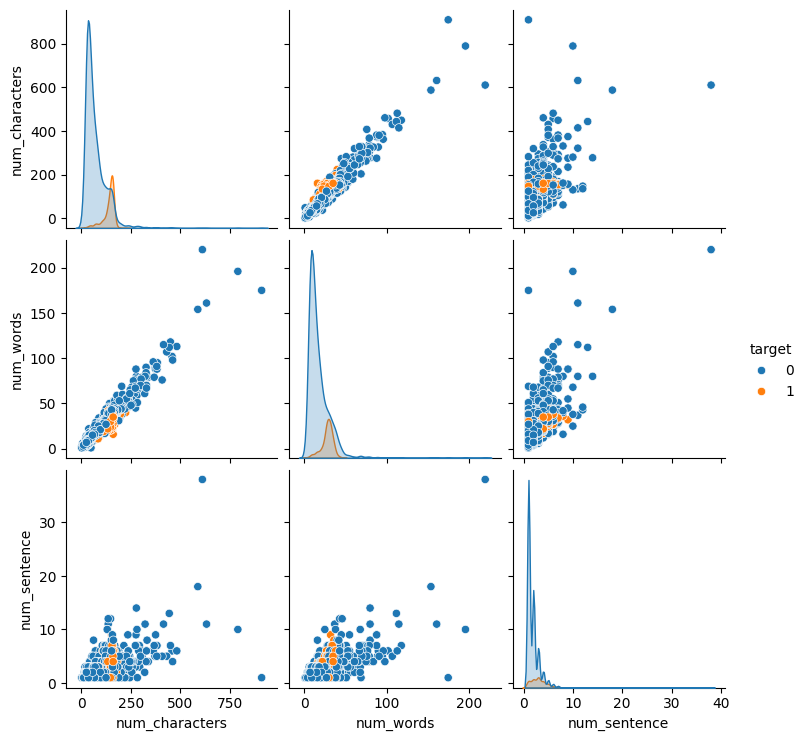

In [33]:
sns.pairplot(df, hue="target")

## 3.Data Preprocessing

In [34]:
import re
import string
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize

In [35]:
def modified_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()

    for i in text:
        y.append(lemmatizer.lemmatize(i))
    
            
    return " ".join(y)

In [36]:
modified_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymore tonight k cried enough today'

In [37]:
#create a new column
df['transformed_text']=df['text'].apply(modified_text)

In [38]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


In [39]:
from wordcloud import WordCloud
wc = WordCloud(width=453,height=458,min_font_size=8.6,background_color='white')

In [40]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

(-0.5, 452.5, 457.5, -0.5)

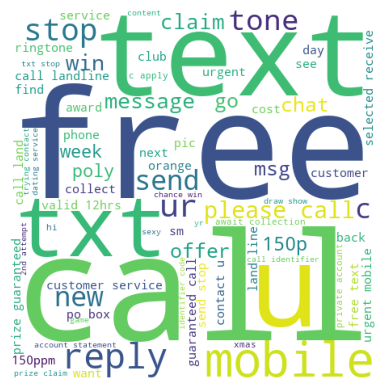

In [41]:
plt.imshow(spam_wc.to_image())
plt.axis("off")

In [42]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

(-0.5, 452.5, 457.5, -0.5)

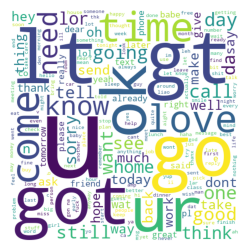

In [43]:
plt.figure(figsize=(6,3))
plt.imshow(ham_wc.to_image())
plt.axis("off")

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


In [45]:
spam_corpus=[]
for sms in df[df['target']==1]['transformed_text'].tolist():
    for word in sms.split():
        spam_corpus.append(word)

In [46]:
len(spam_corpus)

9939

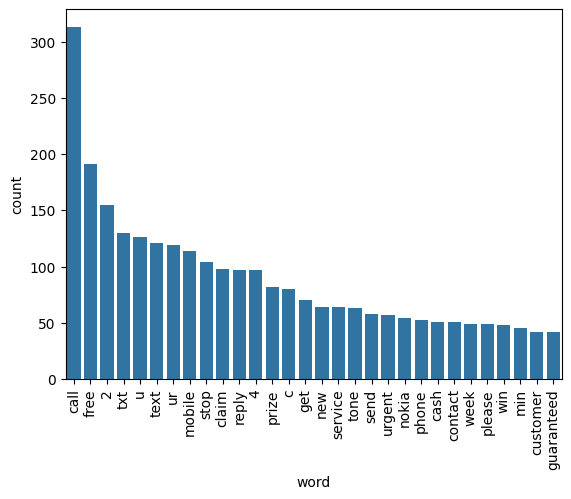

In [47]:
from collections import Counter
spam_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=spam_df)

plt.xticks(rotation='vertical')
plt.show()

In [48]:
ham_corpus=[]
for sms in df[df['target']==0]['transformed_text'].tolist():
    for word in sms.split():
        ham_corpus.append(word)


In [49]:
len(spam_corpus)

9939

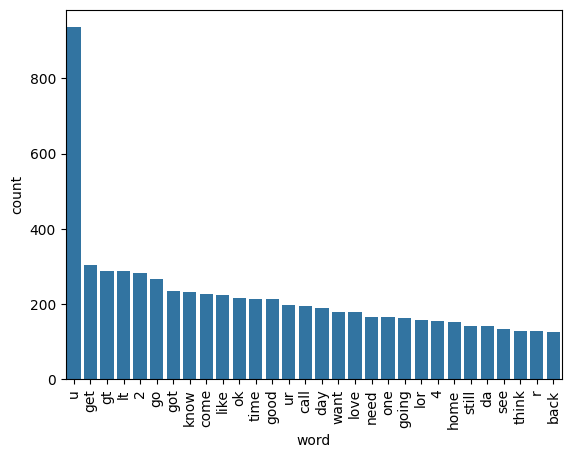

In [50]:
from collections import Counter
ham_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=ham_df)

plt.xticks(rotation='vertical')
plt.show()

## 4.Model Building

In [51]:
# Text Vectorization: Bag of words,TFIDF
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer(max_features=3000)
tfidf = TfidfVectorizer(max_features=3000)

## A.BAG OF WORDS

In [52]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


In [53]:
X1 = cv.fit_transform(df['transformed_text'])

In [54]:
X1.shape

(5169, 3000)

In [55]:
y1=df['target'].values

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=2)

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

## i.Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
bnb=BernoulliNB()
mnb = MultinomialNB()

In [60]:
mnb.fit(X1_train, y1_train)
y_pred1 = mnb.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.9748549323017408
0.8943661971830986
[[881  15]
 [ 11 127]]


In [61]:
mnb.fit(X1_train,y1_train) #multinomial naive bayes
y_pred1 = mnb.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.9748549323017408
0.8943661971830986
[[881  15]
 [ 11 127]]


In [62]:
mnb.fit(X1_train,y1_train) #bernoulli naive bayes
y_pred1 = mnb.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.9748549323017408
0.8943661971830986
[[881  15]
 [ 11 127]]


## ii.SVC

In [63]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)

In [64]:
svc.fit(X1_train,y1_train)
y_pred1=svc.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.9294003868471954
0.7559055118110236
[[865  31]
 [ 42  96]]


## iii.Decision tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)

In [66]:
dtc.fit(X1_train,y1_train)
y_pred1=dtc.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.9264990328820116
0.9305555555555556
[[891   5]
 [ 71  67]]


## iv.Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, random_state=2, n_jobs=-1)

In [68]:
rfc.fit(X1_train,y1_train)
y_pred1=rfc.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.9671179883945842
0.956140350877193
[[891   5]
 [ 29 109]]


## v.Extra Tree

In [69]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=10, random_state=2, n_jobs=-1)

In [70]:
etc.fit(X1_train,y1_train)
y_pred1=etc.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.9738878143133463
0.9826086956521739
[[894   2]
 [ 25 113]]


## vi.Bagging Classifier

In [71]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=10, random_state=2, n_jobs=-1)

In [72]:
bc.fit(X1_train,y1_train)
y_pred1=bc.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.9564796905222437
0.872
[[880  16]
 [ 29 109]]


## vii.Gradient Boosting

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=10, random_state=2)

In [74]:
gbdt.fit(X1_train,y1_train)
y_pred1=gbdt.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.90715667311412
0.92
[[892   4]
 [ 92  46]]


## viii.XG Boost

In [75]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=10, random_state=2, n_jobs=-1)

In [76]:
xgb.fit(X1_train,y1_train)
y_pred1=xgb.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.9555125725338491
0.96
[[892   4]
 [ 42  96]]


## ix.AdaBoost

In [77]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=10, random_state=2)

In [78]:
abc.fit(X1_train,y1_train)
y_pred1=abc.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.937137330754352
0.8924731182795699
[[886  10]
 [ 55  83]]


## x.Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [80]:
lrc.fit(X1_train,y1_train)
y_pred1=lrc.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.9700193423597679
0.9734513274336283
[[893   3]
 [ 28 110]]


## x.K Nearest Neighbour

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [82]:
knc.fit(X1_train,y1_train)
y_pred1=knc.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.9119922630560928
1.0
[[896   0]
 [ 91  47]]


In [83]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [84]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred, average='weighted')
    return accuracy,precision

In [85]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,X1_train,y1_train,X1_test,y1_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [86]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [87]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.974855,0.975216
8,ETC,0.973888,0.974106
4,LR,0.970019,0.970113
5,RF,0.967118,0.966832
10,xgb,0.955513,0.955695
7,BgC,0.956480,0.955272
6,AdaBoost,0.937137,0.935001
0,SVC,0.929400,0.927296
3,DT,0.926499,0.925295
1,KN,0.911992,0.920106


In [88]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [89]:
performance_df1 

,Algorithm,variable,value
0,NB,Accuracy,0.974855
1,ETC,Accuracy,0.973888
2,LR,Accuracy,0.970019
3,RF,Accuracy,0.967118
4,xgb,Accuracy,0.955513
5,BgC,Accuracy,0.956480
6,AdaBoost,Accuracy,0.937137
7,SVC,Accuracy,0.929400
8,DT,Accuracy,0.926499
9,KN,Accuracy,0.911992


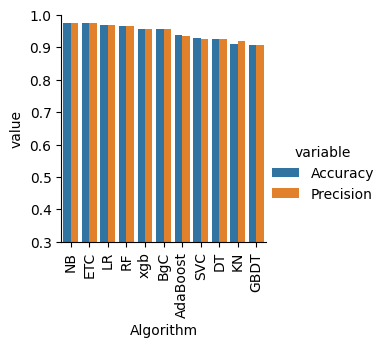

In [90]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=3)
plt.ylim(0.3,1.0)
plt.xticks(rotation='vertical')
plt.show() 

## B.TFIDF

In [91]:
X2 = tfidf.fit_transform(df['transformed_text']).toarray()
X2.shape

(5169, 3000)

In [92]:
y2=df['target'].values

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state=2)

In [95]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [96]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
bnb=BernoulliNB()
mnb = MultinomialNB()

In [97]:
gnb.fit(X2_train,y2_train)  #gaussian naive bayes
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8849129593810445
0.5446009389671361
[[799  97]
 [ 22 116]]


In [98]:
bnb.fit(X2_train,y2_train)  #bernoulli naive bayes
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8849129593810445
0.5446009389671361
[[799  97]
 [ 22 116]]


In [99]:
mnb.fit(X2_train,y2_train)  #multinomial naive bayes
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8849129593810445
0.5446009389671361
[[799  97]
 [ 22 116]]


In [100]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)

In [101]:
svc.fit(X2_train,y2_train)  
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8849129593810445
0.5446009389671361
[[799  97]
 [ 22 116]]


In [102]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)

In [103]:
dtc.fit(X2_train,y2_train)  
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8849129593810445
0.5446009389671361
[[799  97]
 [ 22 116]]


In [104]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [105]:
rfc.fit(X2_train,y2_train)  
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8849129593810445
0.5446009389671361
[[799  97]
 [ 22 116]]


In [106]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [107]:
etc.fit(X2_train,y2_train)  
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8849129593810445
0.5446009389671361
[[799  97]
 [ 22 116]]


In [108]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=50, random_state=2)

In [109]:
bc.fit(X2_train,y2_train)  
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8849129593810445
0.5446009389671361
[[799  97]
 [ 22 116]]


In [110]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

In [111]:
gbdt.fit(X2_train,y2_train)  
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8849129593810445
0.5446009389671361
[[799  97]
 [ 22 116]]


In [112]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [113]:
xgb.fit(X2_train,y2_train)  
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8849129593810445
0.5446009389671361
[[799  97]
 [ 22 116]]


In [114]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

In [115]:
abc.fit(X2_train,y2_train)  
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8849129593810445
0.5446009389671361
[[799  97]
 [ 22 116]]


In [116]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [117]:
lrc.fit(X2_train,y2_train)  
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8849129593810445
0.5446009389671361
[[799  97]
 [ 22 116]]


In [118]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [119]:
knc.fit(X2_train,y2_train)  
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8849129593810445
0.5446009389671361
[[799  97]
 [ 22 116]]


In [120]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,X2_train,y2_train,X2_test,y2_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [121]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [122]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.975801
2,NB,0.973888,0.974652
5,RF,0.967118,0.966832
8,ETC,0.964217,0.963747
7,BgC,0.954545,0.953251
4,LR,0.950677,0.950206
10,xgb,0.948743,0.947385
3,DT,0.939072,0.936161
6,AdaBoost,0.937137,0.935001
9,GBDT,0.923598,0.920498


In [123]:
performance_df2 = pd.melt(performance_df, id_vars = "Algorithm")

In [124]:
performance_df2 

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,NB,Accuracy,0.973888
2,RF,Accuracy,0.967118
3,ETC,Accuracy,0.964217
4,BgC,Accuracy,0.954545
5,LR,Accuracy,0.950677
6,xgb,Accuracy,0.948743
7,DT,Accuracy,0.939072
8,AdaBoost,Accuracy,0.937137
9,GBDT,Accuracy,0.923598


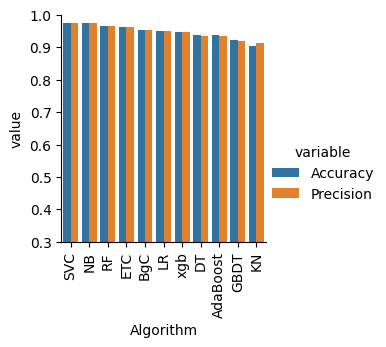

In [125]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df2, kind='bar',height=3)
plt.ylim(0.3,1.0)
plt.xticks(rotation='vertical')
plt.show() 

In [126]:
# example test input
msg = ["Congratulations! You have won a $1000 Walmart gift card. Call now!"]

# transform text (use SAME vectorizer used in training)
msg_vec = cv.transform(msg)

# predict
pred = svc.predict(msg_vec.toarray())

print("Spam" if pred[0] == 1 else "Not Spam")

Spam


In [127]:
import pickle
pickle.dump(svc, open("svc_model.pkl", "wb"))
pickle.dump(cv, open("cv.pkl", "wb"))